<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Retrieve-dependency-monkey-ids-for-the-inspection-identifier" data-toc-modified-id="Retrieve-dependency-monkey-ids-for-the-inspection-identifier-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Retrieve dependency monkey ids for the inspection identifier</a></span></li><li><span><a href="#Retrieve-filtered-inspection-ids" data-toc-modified-id="Retrieve-filtered-inspection-ids-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Retrieve filtered inspection ids</a></span></li><li><span><a href="#Aggregate-inspection-results" data-toc-modified-id="Aggregate-inspection-results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aggregate inspection results</a></span></li><li><span><a href="#Create-Inspection-dataframes" data-toc-modified-id="Create-Inspection-dataframes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create Inspection dataframes</a></span></li><li><span><a href="#Create-reports-from-inspections" data-toc-modified-id="Create-reports-from-inspections-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Create reports from inspections</a></span></li><li><span><a href="#Create-Visualization-of-performance-for-software-stacks" data-toc-modified-id="Create-Visualization-of-performance-for-software-stacks-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Create Visualization of performance for software stacks</a></span><ul class="toc-item"><li><span><a href="#Filter-final-dataframe" data-toc-modified-id="Filter-final-dataframe-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Filter final dataframe</a></span></li><li><span><a href="#Create-plots" data-toc-modified-id="Create-plots-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Create plots</a></span></li></ul></li><li><span><a href="#Analysis-of-inspection-batches" data-toc-modified-id="Analysis-of-inspection-batches-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Analysis of inspection batches</a></span><ul class="toc-item"><li><span><a href="#Error-analysis" data-toc-modified-id="Error-analysis-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Error analysis</a></span><ul class="toc-item"><li><span><a href="#Histogram-of-the-elapsed-batches" data-toc-modified-id="Histogram-of-the-elapsed-batches-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Histogram of the <code>elapsed</code> batches</a></span></li><li><span><a href="#Histogram-of-the-rate-batches" data-toc-modified-id="Histogram-of-the-rate-batches-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Histogram of the <code>rate</code> batches</a></span></li><li><span><a href="#Box-plot-and-violin-plot-of-the-elapsed-batches" data-toc-modified-id="Box-plot-and-violin-plot-of-the-elapsed-batches-8.1.3"><span class="toc-item-num">8.1.3&nbsp;&nbsp;</span>Box plot and violin plot of the <code>elapsed</code> batches</a></span></li><li><span><a href="#Box-plot-and-violin-plot-of-the-rate-batches" data-toc-modified-id="Box-plot-and-violin-plot-of-the-rate-batches-8.1.4"><span class="toc-item-num">8.1.4&nbsp;&nbsp;</span>Box plot and violin plot of the <code>rate</code> batches</a></span></li></ul></li><li><span><a href="#Interpolations" data-toc-modified-id="Interpolations-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Interpolations</a></span><ul class="toc-item"><li><span><a href="#Standard-Deviation-analysis" data-toc-modified-id="Standard-Deviation-analysis-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Standard Deviation analysis</a></span></li><li><span><a href="#Standard-Error-analysis" data-toc-modified-id="Standard-Error-analysis-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Standard Error analysis</a></span></li><li><span><a href="#Box-Plots-interpolated-for-elapsed_time" data-toc-modified-id="Box-Plots-interpolated-for-elapsed_time-8.2.3"><span class="toc-item-num">8.2.3&nbsp;&nbsp;</span>Box Plots interpolated for <code>elapsed_time</code></a></span></li><li><span><a href="#Box-Plots-interpolated-for-rate" data-toc-modified-id="Box-Plots-interpolated-for-rate-8.2.4"><span class="toc-item-num">8.2.4&nbsp;&nbsp;</span>Box Plots interpolated for <code>rate</code></a></span></li><li><span><a href="#Coefficient-of-Variation-analysis" data-toc-modified-id="Coefficient-of-Variation-analysis-8.2.5"><span class="toc-item-num">8.2.5&nbsp;&nbsp;</span>Coefficient of Variation analysis</a></span></li></ul></li></ul></li><li><span><a href="#Inspection-Time-analysis" data-toc-modified-id="Inspection-Time-analysis-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Inspection Time analysis</a></span><ul class="toc-item"><li><span><a href="#Inspection-Builds-Time" data-toc-modified-id="Inspection-Builds-Time-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Inspection Builds Time</a></span></li><li><span><a href="#Inspection-Jobs-Time" data-toc-modified-id="Inspection-Jobs-Time-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Inspection Jobs Time</a></span></li><li><span><a href="#Inspection-Builds-+-Jobs-Time" data-toc-modified-id="Inspection-Builds-+-Jobs-Time-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Inspection Builds + Jobs Time</a></span></li></ul></li></ul></div>

# Introduction

In [1]:
import seaborn as sns

from typing import Union, List, Dict, Any, Tuple, Optional

from thoth.lab import underscore, inspection, inspection_report, dependency_monkey

sns.set(style="whitegrid")

In [2]:
IDENTIFIERS_INSPECTION = [
    "cvut-6",
]

# Filters for plot
PI_COMPONENT = "tensorflow"
PI_NAME = "PiConv2D"
RUNTIME_ENVIRONMENT = "rhel-8.1-py36"
PYTHON_PACKAGES = None

LIMIT_RESULTS = True
PROJECT_DIR_NAME = "Test"
STATIC_FIGURE = True

In [3]:
THOTH_CEPH_BUCKET="thoth"
THOTH_CEPH_BUCKET_PREFIX="data/thoth"
THOTH_DEPLOYMENT_NAME="thoth-psi-stage"
THOTH_S3_ENDPOINT_URL="https://s3.upshift.redhat.com/"

In [4]:
%env THOTH_CEPH_BUCKET         $THOTH_CEPH_BUCKET
%env THOTH_CEPH_BUCKET_PREFIX  $THOTH_CEPH_BUCKET_PREFIX
%env THOTH_S3_ENDPOINT_URL     $THOTH_S3_ENDPOINT_URL
%env THOTH_DEPLOYMENT_NAME     $THOTH_DEPLOYMENT_NAME

env: THOTH_CEPH_BUCKET=thoth
env: THOTH_CEPH_BUCKET_PREFIX=data/thoth
env: THOTH_S3_ENDPOINT_URL=https://s3.upshift.redhat.com/
env: THOTH_DEPLOYMENT_NAME=thoth-psi-stage


In [5]:
INSPECTION_PARAMETERS_TO_ANALYZE = [
    "elapsed",
    "rate"]

SAVE_RESULTS = True

# Retrieve dependency monkey ids for the inspection identifier

In [6]:
inspection_batch_info, INSPECTION_BATCH_IDS = dependency_monkey.aggregate_dm_results_per_identifier(
    IDENTIFIERS_INSPECTION,
    limit_results=LIMIT_RESULTS,
    max_batch_identifiers_ids=5)

# Retrieve filtered inspection ids

In [71]:
filtered_inspection_ids, REDUCED_INSPECTION_BATCH_IDS = inspection.filter_inspection_ids(INSPECTION_BATCH_IDS)

In [72]:
inspection.show_inspection_inputs(
    filtered_inspection_ids,
    INSPECTION_BATCH_IDS,
    REDUCED_INSPECTION_BATCH_IDS
)

# Aggregate inspection results

In [73]:
#Clean dataset from possible errors in inspections
inspection_results_dict = inspection.aggregate_inspection_results_per_identifier(
    filtered_inspection_ids,
    REDUCED_INSPECTION_BATCH_IDS,
    inspection_batch_info
)

# Create Inspection dataframes

In [74]:
inspection_df_dict, inspections_df = inspection.create_inspection_dataframes(inspection_results_dict)

In [75]:
inspections_df

,build_log,datetime,exit_code,hwinfo__cpu_features__flags,hwinfo__cpu_features__hz_actual,hwinfo__cpu_features__hz_actual_raw,hwinfo__cpu_features__hz_advertised,hwinfo__cpu_features__hz_advertised_raw,hwinfo__cpu_features__l1_data_cache_size,hwinfo__cpu_features__l1_instruction_cache_size,...,requirements_locked__default__pbr__version,requirements_locked__default__tensorflow-estimator__hashes,requirements_locked__default__tensorflow-estimator__index,requirements_locked__default__tensorflow-estimator__version,requirements_locked__default__bleach__hashes,requirements_locked__default__bleach__index,requirements_locked__default__bleach__version,requirements_locked__default__html5lib__hashes,requirements_locked__default__html5lib__index,requirements_locked__default__html5lib__version
0,None,2020-03-11T07:05:13.478963,0,"[3dnowprefetch, abm, adx, aes, apic, arat, avx...",2.6937 GHz,"[2693666000, 0]",2.6937 GHz,"[2693666000, 0]",32 KB,32 KB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,2020-03-13T04:14:30.279193,0,"[3dnowprefetch, abm, adx, aes, apic, arat, avx...",2.6937 GHz,"[2693672000, 0]",2.6937 GHz,"[2693672000, 0]",32 KB,32 KB,...,==3.1.0,[sha256:7cfdaa3e83e3532f31713713feb98be7ea9f30...,pypi-org,==1.13.0,NaN,NaN,NaN,NaN,NaN,NaN
2,None,2020-03-12T21:25:18.491663,0,"[3dnowprefetch, abm, adx, aes, apic, arat, avx...",2.6937 GHz,"[2693668000, 0]",2.6937 GHz,"[2693668000, 0]",32 KB,32 KB,...,==3.1.0,[sha256:7cfdaa3e83e3532f31713713feb98be7ea9f30...,pypi-org,==1.13.0,NaN,NaN,NaN,NaN,NaN,NaN
3,None,2020-03-16T11:35:30.901847,0,"[3dnowprefetch, abm, adx, aes, apic, arat, avx...",2.6937 GHz,"[2693666000, 0]",2.6937 GHz,"[2693666000, 0]",32 KB,32 KB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,2020-03-13T17:52:42.046079,0,"[3dnowprefetch, abm, adx, aes, apic, arat, avx...",2.6937 GHz,"[2693672000, 0]",2.6937 GHz,"[2693672000, 0]",32 KB,32 KB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,2020-03-11T20:39:47.158098,0,"[3dnowprefetch, abm, adx, aes, apic, arat, avx...",2.6936 GHz,"[2693642000, 0]",2.6936 GHz,"[2693642000, 0]",32 KB,32 KB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,2020-03-10T18:22:39.975163,0,"[3dnowprefetch, abm, adx, aes, apic, arat, avx...",2.6937 GHz,"[2693672000, 0]",2.6937 GHz,"[2693672000, 0]",32 KB,32 KB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,None,2020-03-14T21:20:28.371724,0,"[3dnowprefetch, abm, adx, aes, apic, arat, avx...",2.6937 GHz,"[2693670000, 0]",2.6937 GHz,"[2693670000, 0]",32 KB,32 KB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,None,2020-03-10T13:36:40.783535,0,"[3dnowprefetch, abm, adx, aes, apic, arat, avx...",2.6937 GHz,"[2693672000, 0]",2.6937 GHz,"[2693672000, 0]",32 KB,32 KB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,None,2020-03-12T13:54:47.483601,0,"[3dnowprefetch, abm, adx, aes, apic, arat, avx...",2.6937 GHz,"[2693670000, 0]",2.6937 GHz,"[2693670000, 0]",32 KB,32 KB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Create reports from inspections

In [76]:
dfs_inspection_classes, dfs_unique_inspection_classes = inspection_report.create_dfs_inspection_classes(df=inspections_df)

In [77]:
inspection_report.multi_table(dfs_unique_inspection_classes["hardware"])

In [78]:
dfs_unique_inspection_classes["software_stack"]

,requirements_locked___meta__hash__sha256,requirements_locked___meta__pipfile-spec,requirements_locked___meta__requires__python_version,requirements_locked___meta__sources,requirements_locked__default__absl-py__hashes,requirements_locked__default__absl-py__index,requirements_locked__default__absl-py__version,requirements_locked__default__astor__hashes,requirements_locked__default__astor__index,requirements_locked__default__astor__version,...,requirements_locked__default__pbr__version,requirements_locked__default__tensorflow-estimator__hashes,requirements_locked__default__tensorflow-estimator__index,requirements_locked__default__tensorflow-estimator__version,requirements_locked__default__bleach__hashes,requirements_locked__default__bleach__index,requirements_locked__default__bleach__version,requirements_locked__default__html5lib__hashes,requirements_locked__default__html5lib__index,requirements_locked__default__html5lib__version
0,[4ebcefecc23e0a6edf66d6637068314cf8dc576a9fbfd...,[6],[3.6],"[[{'name': 'pypi-org', 'url': 'https://pypi.or...",[[sha256:adbf3b65f9d5cb89d0161125df2bfe3c8d097...,"[pypi-org, nan]","[==0.6.0, ==0.1.13, nan, ==0.2.0, ==0.8.1, ==0...",[[sha256:e4911a6d2d5dee5c54e99ed549ccbcf07dc5d...,"[pypi-org, nan]","[==0.6.1, ==0.6.2, nan, ==0.7.1, ==0.6, ==0.7....",...,"[nan, ==3.1.0]","[nan, [sha256:7cfdaa3e83e3532f31713713feb98be7...","[nan, pypi-org]","[nan, ==1.13.0]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, pypi-org]","[nan, ==1.5.0]","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, pypi-org]","[nan, ==0.9999999]"


In [79]:
sws_df = dfs_unique_inspection_classes["software_stack"]
sws_df[[col for col in sws_df.columns.values if "__version" in col]]

,requirements_locked__default__absl-py__version,requirements_locked__default__astor__version,requirements_locked__default__gast__version,requirements_locked__default__grpcio__version,requirements_locked__default__h5py__version,requirements_locked__default__keras-applications__version,requirements_locked__default__keras-preprocessing__version,requirements_locked__default__markdown__version,requirements_locked__default__numpy__version,requirements_locked__default__protobuf__version,...,requirements_locked__default__tensorboard__version,requirements_locked__default__tensorflow__version,requirements_locked__default__termcolor__version,requirements_locked__default__werkzeug__version,requirements_locked__default__wheel__version,requirements_locked__default__mock__version,requirements_locked__default__pbr__version,requirements_locked__default__tensorflow-estimator__version,requirements_locked__default__bleach__version,requirements_locked__default__html5lib__version
0,"[==0.6.0, ==0.1.13, nan, ==0.2.0, ==0.8.1, ==0...","[==0.6.1, ==0.6.2, nan, ==0.7.1, ==0.6, ==0.7....","[==0.2.1, ==0.2.2, ==0.3.0, nan, ==0.2.1.post1...","[==1.23.0, ==1.20.0, nan, ==1.12.0, ==1.22.1, ...","[==2.7.0, ==2.9.0, ==2.6.0, nan, ==2.8.0, ==2....","[==1.0.7, ==1.0.8, nan]","[==1.0.9, ==1.0.5, nan]","[==2.6.8, nan, ==2.6.9, ==3.0, ==3.0.1, ==2.6.11]","[==1.14.4, ==1.16.2, ==1.17.2, ==1.14.5, ==1.1...","[==3.7.1, ==3.8.0, ==3.5.2.post1, ==3.7.0, ==3...",...,"[==1.12.2, nan, ==1.10.0, ==1.11.0, ==1.12.0, ...","[==1.12.2, ==1.13.1, ==1.1.0, ==1.10.0, ==1.0....","[==1.1.0, nan]","[==0.15.2, nan, ==0.15.5, ==0.11.13, ==0.14, =...","[==0.32.2, ==0.33.1, ==0.33.5, ==0.32.3, ==0.3...","[nan, ==2.0.0, ==3.0.3, ==3.0.1, ==3.0.2]","[nan, ==3.1.0]","[nan, ==1.13.0]","[nan, ==1.5.0]","[nan, ==0.9999999]"


In [80]:
dfs_unique_inspection_classes["base_image"]

,os_release__name,os_release__version,os_release__version_id
0,[Red Hat Enterprise Linux],[8.1 (Ootpa)],[8.1]


In [81]:
dfs_unique_inspection_classes["pi"]

,script_sha256,stdout__@parameters__batch,stdout__@parameters__data_format,stdout__@parameters__device,stdout__@parameters__dtype,stdout__@parameters__filter_height,stdout__@parameters__filter_width,stdout__@parameters__input_channels,stdout__@parameters__input_height,stdout__@parameters__input_width,stdout__@parameters__output_channels,stdout__@parameters__padding,stdout__@parameters__reps,stdout__@parameters__strides,stdout__component
0,[696a127288f05aa5f2cff4ce713e52eb235bd00a50a84...,[4],[NHWC],[cpu],[float32],[20],[5],[1],[700],[161],[32],[SAME],[2000],[2],[tensorflow]


# Create Visualization of performance for software stacks

In [82]:
python_packages_dataframe, python_packages_versions = inspection.create_python_package_df(inspection_df=inspections_df)
python_packages_dataframe

,absl-py,astor,gast,grpcio,h5py,keras-applications,keras-preprocessing,markdown,numpy,protobuf,...,tensorboard,tensorflow,termcolor,werkzeug,wheel,mock,pbr,tensorflow-estimator,bleach,html5lib
0,"(absl-py, ==0.6.0, pypi-org)","(astor, ==0.6.1, pypi-org)","(gast, ==0.2.1, pypi-org)","(grpcio, ==1.23.0, pypi-org)","(h5py, ==2.7.0, pypi-org)","(keras-applications, ==1.0.7, pypi-org)","(keras-preprocessing, ==1.0.9, pypi-org)","(markdown, ==2.6.8, pypi-org)","(numpy, ==1.14.4, pypi-org)","(protobuf, ==3.7.1, pypi-org)",...,"(tensorboard, ==1.12.2, pypi-org)","(tensorflow, ==1.12.2, pypi-org)","(termcolor, ==1.1.0, pypi-org)","(werkzeug, ==0.15.2, pypi-org)","(wheel, ==0.32.2, pypi-org)","(, , )","(, , )","(, , )","(, , )","(, , )"
1,"(absl-py, ==0.1.13, pypi-org)","(astor, ==0.6.2, pypi-org)","(gast, ==0.2.2, pypi-org)","(grpcio, ==1.20.0, pypi-org)","(h5py, ==2.9.0, pypi-org)","(keras-applications, ==1.0.8, pypi-org)","(keras-preprocessing, ==1.0.5, pypi-org)","(, , )","(numpy, ==1.16.2, pypi-org)","(protobuf, ==3.8.0, pypi-org)",...,"(, , )","(tensorflow, ==1.13.1, pypi-org)","(termcolor, ==1.1.0, pypi-org)","(, , )","(wheel, ==0.33.1, pypi-org)","(mock, ==2.0.0, pypi-org)","(pbr, ==3.1.0, pypi-org)","(tensorflow-estimator, ==1.13.0, pypi-org)","(, , )","(, , )"
2,"(absl-py, ==0.1.13, pypi-org)","(astor, ==0.6.1, pypi-org)","(gast, ==0.3.0, pypi-org)","(grpcio, ==1.20.0, pypi-org)","(h5py, ==2.6.0, pypi-org)","(keras-applications, ==1.0.7, pypi-org)","(keras-preprocessing, ==1.0.5, pypi-org)","(, , )","(numpy, ==1.16.2, pypi-org)","(protobuf, ==3.8.0, pypi-org)",...,"(, , )","(tensorflow, ==1.13.1, pypi-org)","(termcolor, ==1.1.0, pypi-org)","(, , )","(wheel, ==0.33.5, pypi-org)","(mock, ==2.0.0, pypi-org)","(pbr, ==3.1.0, pypi-org)","(tensorflow-estimator, ==1.13.0, pypi-org)","(, , )","(, , )"
3,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(numpy, ==1.17.2, pypi-org)","(protobuf, ==3.5.2.post1, pypi-org)",...,"(, , )","(tensorflow, ==1.1.0, pypi-org)","(, , )","(werkzeug, ==0.15.5, pypi-org)","(wheel, ==0.32.3, pypi-org)","(, , )","(, , )","(, , )","(, , )","(, , )"
4,"(absl-py, ==0.2.0, pypi-org)","(astor, ==0.6.1, pypi-org)","(gast, ==0.2.1.post1, pypi-org)","(grpcio, ==1.12.0, pypi-org)","(, , )","(, , )","(, , )","(markdown, ==2.6.9, pypi-org)","(numpy, ==1.14.5, pypi-org)","(protobuf, ==3.7.0, pypi-org)",...,"(tensorboard, ==1.10.0, pypi-org)","(tensorflow, ==1.10.0, pypi-org)","(termcolor, ==1.1.0, pypi-org)","(werkzeug, ==0.11.13, pypi-org)","(wheel, ==0.32.3, pypi-org)","(, , )","(, , )","(, , )","(, , )","(, , )"
5,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(numpy, ==1.17.3, pypi-org)","(protobuf, ==3.4.0, pypi-org)",...,"(, , )","(tensorflow, ==1.0.0, pypi-org)","(, , )","(, , )","(wheel, ==0.33.6, pypi-org)","(, , )","(, , )","(, , )","(, , )","(, , )"
6,"(absl-py, ==0.8.1, pypi-org)","(astor, ==0.7.1, pypi-org)","(gast, ==0.2.1.post0, pypi-org)","(grpcio, ==1.22.1, pypi-org)","(, , )","(, , )","(, , )","(markdown, ==3.0, pypi-org)","(numpy, ==1.14.4, pypi-org)","(protobuf, ==3.6.0, pypi-org)",...,"(tensorboard, ==1.11.0, pypi-org)","(tensorflow, ==1.6.0, pypi-org)","(, , )","(werkzeug, ==0.14, pypi-org)","(wheel, ==0.31.0, pypi-org)","(, , )","(, , )","(, , )","(, , )","(, , )"
7,"(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(, , )","(numpy, ==1.16.0, pypi-org)","(protobuf, ==3.9.1, pypi-org)",...,"(, , )","(tensorflow, ==1.0.1, pypi-org)","(, , )","(, , )","(wheel, ==0.30.0, pypi-org)","(, , )","(, , )","(, , )","(, , )","(, , )"
8,"(absl-py, ==0.1.13, pypi-org)","(astor, ==0.6, pypi-org)","(gast, ==0.2.1.post0, pypi-org)","(grpcio, ==1.24.0, pypi-org)","(, , )","(, , )","(, , )","(markdown, ==2.6.8, pypi-org)","(numpy, ==1.14.4, pypi-org)","(protobuf, ==3.6.0, pypi-org)",...,"(tensorboard, ==1.11.0, pypi-org)","(tensorflow, ==1.6.0, pypi-org)","(termcolor, ==1.1.0, pypi-org)","(werkzeug, ==0.16.0, pypi-org)","(wheel, ==0.31.0, pypi-org)",

In [83]:
final_dataframe = inspection.create_final_dataframe(
    packages_versions=python_packages_versions,
    python_packages_dataframe=python_packages_dataframe,
    df=inspections_df
)

## Filter final dataframe

In [84]:
plot_df = inspection.create_filtered_df(
    df=final_dataframe,
    pi_name=PI_NAME,
    pi_component=PI_COMPONENT,
    runtime_environment=RUNTIME_ENVIRONMENT,
    packages=PYTHON_PACKAGES
)

## Create plots

In [85]:
inspection.create_inspection_3d_plot(plot_df=plot_df, quantity="elapsed_time", identifiers_inspections=IDENTIFIERS_INSPECTION)

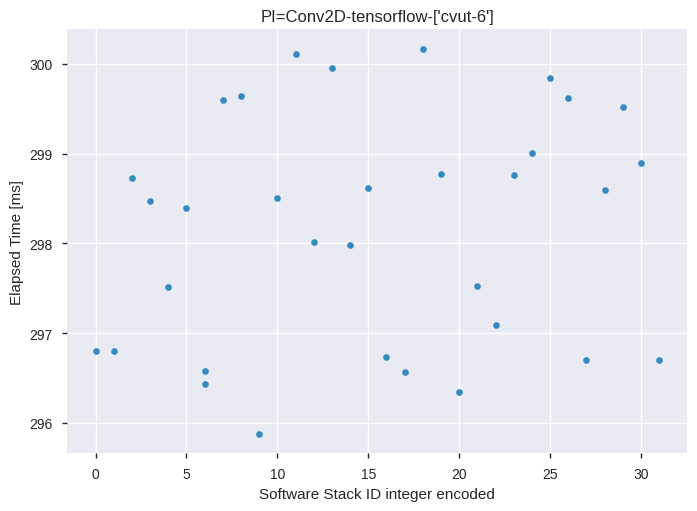

In [86]:
inspection.create_plot_from_df(
    plot_df,
    columns= ["sws_hash_id_encoded","elapsed_time"],
    title_plot=f"PI=Conv2D-tensorflow-{IDENTIFIERS_INSPECTION}",
    x_label="Software Stack ID integer encoded", 
    y_label="Elapsed Time [ms]",
    static=STATIC_FIGURE,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="InspectionPlots",
    scatter=True
)

In [87]:
inspection.create_inspection_2d_plot(plot_df=plot_df, quantity="elapsed_time", identifiers_inspections=IDENTIFIERS_INSPECTION)

In [88]:
inspection.create_inspection_3d_plot(plot_df=plot_df, quantity="rate", identifiers_inspections=IDENTIFIERS_INSPECTION)

In [89]:
inspection.create_inspection_2d_plot(plot_df=plot_df, quantity="rate", identifiers_inspections=IDENTIFIERS_INSPECTION)

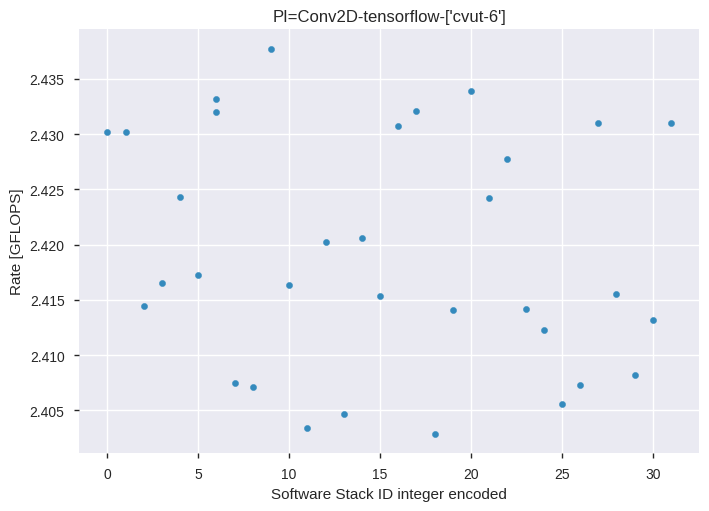

In [90]:
inspection.create_plot_from_df(
    plot_df,
    columns= ["sws_hash_id_encoded","rate"],
    title_plot=f"PI=Conv2D-tensorflow-{IDENTIFIERS_INSPECTION}",
    x_label="Software Stack ID integer encoded", 
    y_label="Rate [GFLOPS]",
    static=STATIC_FIGURE,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="InspectionPlots",
    scatter=True
)

# Analysis of inspection batches

## Error analysis

In [91]:
inspection_parameters_df_dict = inspection.create_inspection_parameters_dataframes(
    INSPECTION_PARAMETERS_TO_ANALYZE,
    inspection_df_dict)

### Histogram of the `elapsed` batches

In [92]:
inspection.create_plot_multiple_batches(
    data=inspection_parameters_df_dict,
    quantity="elapsed",
    plot_type="hist",
    x_label="Elapsed Time [ms]",
    y_label="Count",
    static=STATIC_FIGURE,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Histograms"
)

### Histogram of the `rate` batches

In [93]:
inspection.create_plot_multiple_batches(
    data=inspection_parameters_df_dict,
    quantity="rate",
    plot_type="hist",
    x_label="Rate [GFLOPS]",
    y_label="Count",
    static=STATIC_FIGURE,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Histograms"
)

### Box plot and violin plot of the `elapsed` batches

In [94]:
inspection.create_plot_multiple_batches(
    data=inspection_parameters_df_dict,
    quantity="elapsed",
    plot_type="box",
    x_label="Elapsed Time [ms]",
    y_label="Count",
    static=STATIC_FIGURE,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="BoxPlots"
)

In [95]:
inspection.create_multiple_violin_plot(
    data=inspection_parameters_df_dict,
    quantity="elapsed",
    x_label="Batch identifier",
    y_label="Elapsed Time [ms]",
    linewidth=2,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="ViolinPlots")

2020-03-17 13:57:41,379 [145331] WARNING  py.warnings:99: [JupyterRequire] /home/fmurdaca/.local/share/virtualenvs/notebooks-3RWCrxj8/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.




### Box plot and violin plot of the `rate` batches

In [96]:
inspection.create_plot_multiple_batches(
    data=inspection_parameters_df_dict,
    quantity="rate",
    plot_type="box",
    x_label="Rate [GFLOPS]",
    y_label="Count",
    static=STATIC_FIGURE,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="BoxPlots"
)

In [97]:
inspection.create_multiple_violin_plot(
    data=inspection_parameters_df_dict,
    quantity="rate",
    x_label="Batch identifier",
    y_label="Rate [GFLOPS]",
    linewidth=2,
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="ViolinPlots")

2020-03-17 13:57:51,854 [145331] WARNING  py.warnings:99: [JupyterRequire] /home/fmurdaca/.local/share/virtualenvs/notebooks-3RWCrxj8/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.




## Interpolations

In [98]:
inspection_statistics_dict, REDUCED_INSPECTION_BATCH = inspection.evaluate_inspection_statistics(
        INSPECTION_PARAMETERS_TO_ANALYZE,
        inspection_df_dict)

### Standard Deviation analysis

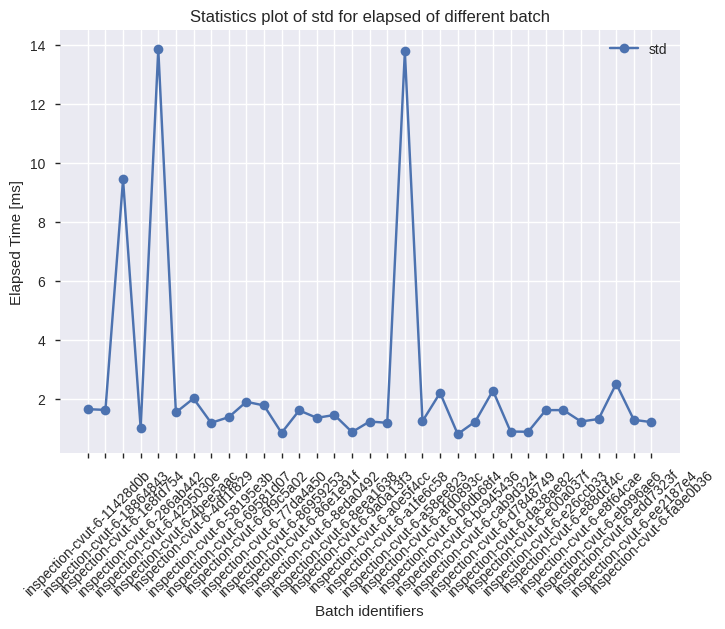

In [99]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["elapsed"],
    colour_list=["b"],
    statistical_quantities=["std"],
    title_plot="Statistics plot of std for elapsed of different batch",
    title_xlabel="Batch identifiers",
    title_ylabel="Elapsed Time [ms]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Statistics")

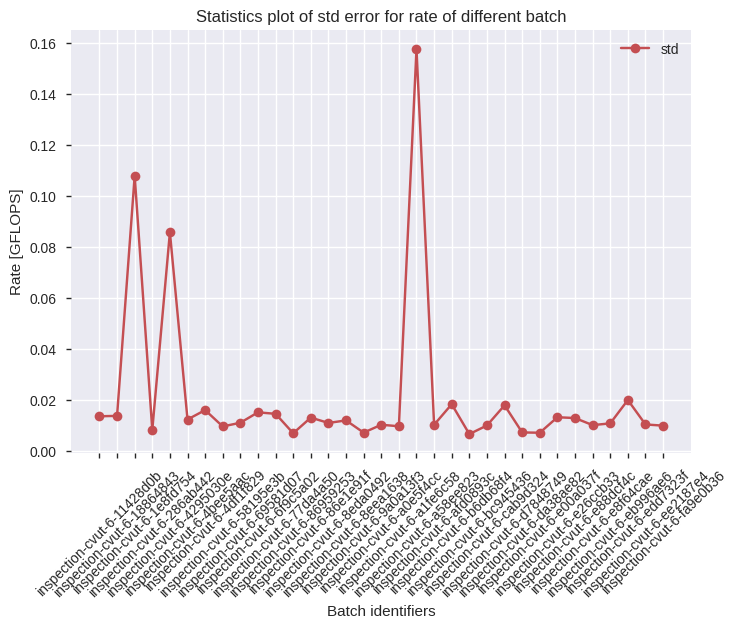

In [100]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["rate"],
    colour_list=["r"],
    statistical_quantities=["std"],
    title_plot="Statistics plot of std error for rate of different batch",
    title_xlabel="Batch identifiers",
    title_ylabel="Rate [GFLOPS]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Statistics")

### Standard Error analysis

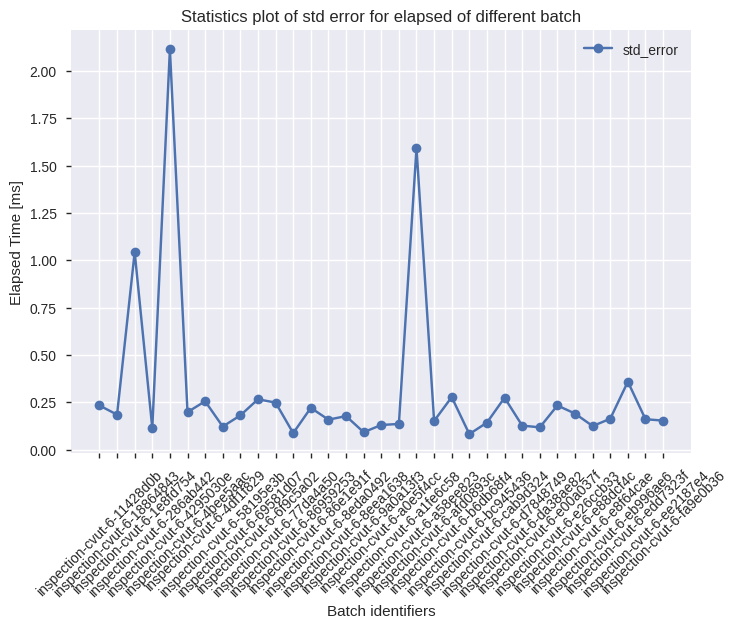

In [101]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["elapsed"],
    colour_list=["b"],
    statistical_quantities=["std_error"],
    title_plot="Statistics plot of std error for elapsed of different batch",
    title_xlabel="Batch identifiers",
    title_ylabel="Elapsed Time [ms]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Statistics")

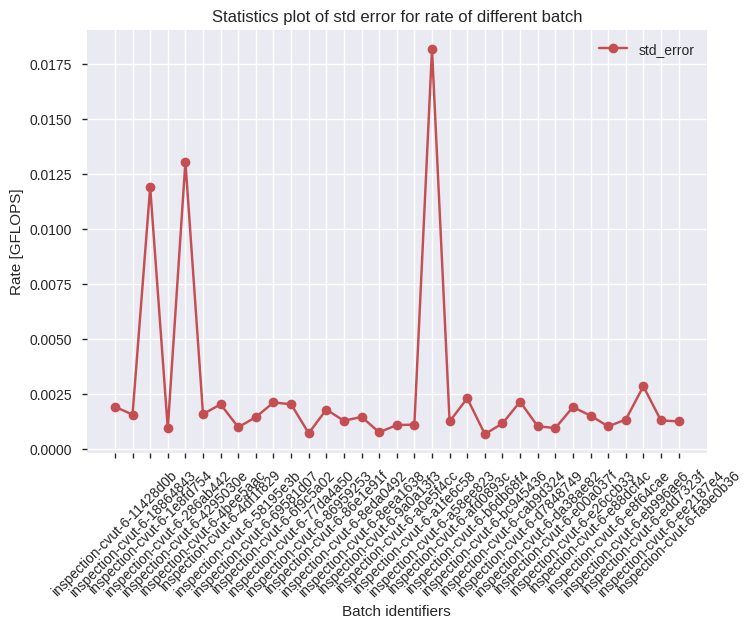

In [102]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["rate"],
    colour_list=["r"],
    statistical_quantities=["std_error"],
    title_plot="Statistics plot of std error for rate of different batch",
    title_xlabel="Batch identifiers",
    title_ylabel="Rate [GFLOPS]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Statistics")

### Box Plots interpolated for `elapsed_time`

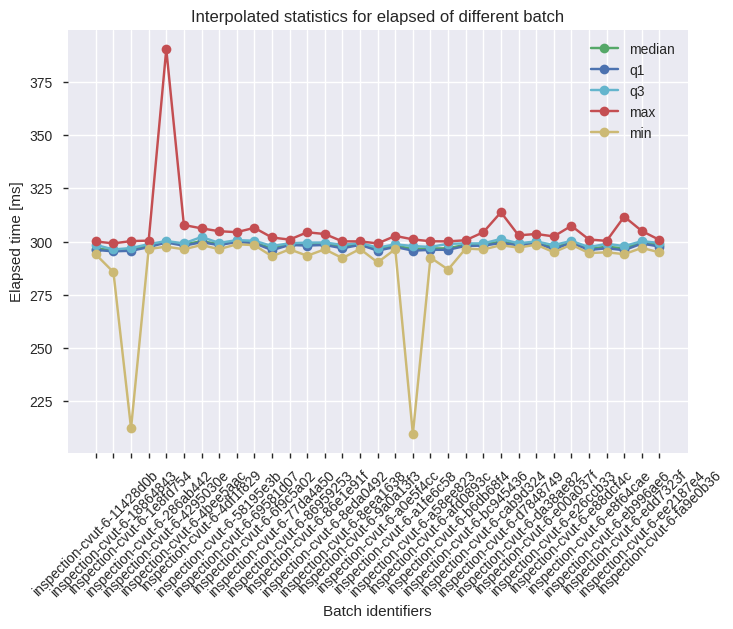

In [103]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["elapsed"],
    colour_list=["g", "b", "c", "r", "y"],
    statistical_quantities=["median", "q1", "q3", "max", "min"],
    title_plot="Interpolated statistics for elapsed of different batch",
    title_xlabel="Batch identifiers",
    title_ylabel="Elapsed time [ms]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Interpolations")

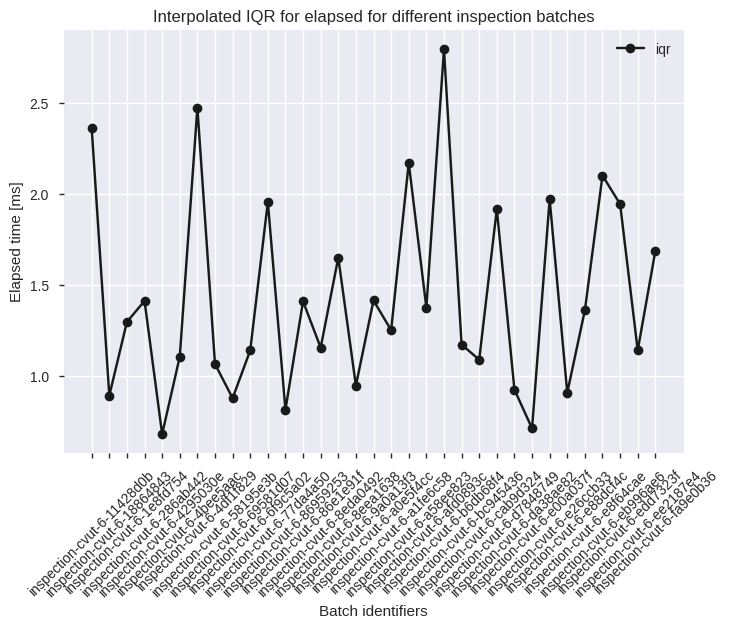

In [104]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["elapsed"],
    colour_list=["k"],
    statistical_quantities=["iqr"],
    title_plot="Interpolated IQR for elapsed for different inspection batches",
    title_xlabel="Batch identifiers",
    title_ylabel="Elapsed time [ms]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Interpolations")

### Box Plots interpolated for `rate`

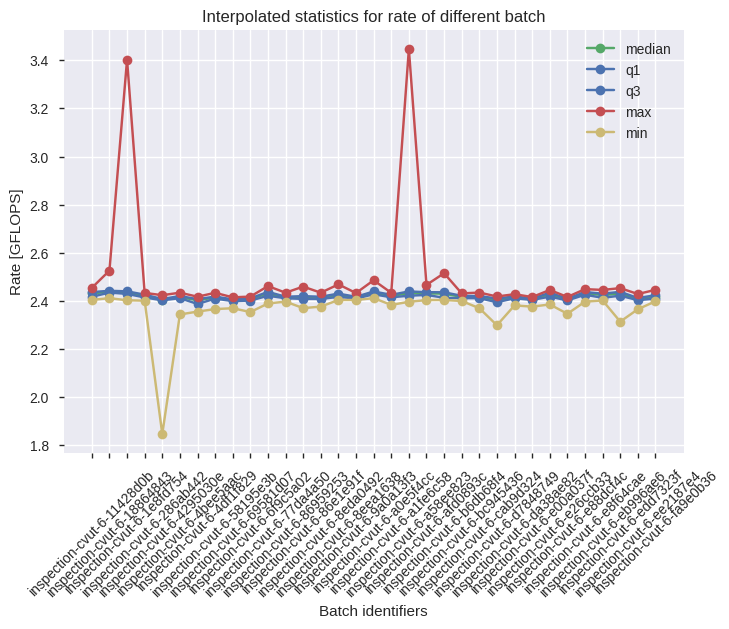

In [105]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["rate"],
    colour_list=["g", "b", "b", "r", "y"],
    statistical_quantities=["median", "q1", "q3", "max", "min"],
    title_plot="Interpolated statistics for rate of different batch",
    title_xlabel="Batch identifiers",
    title_ylabel="Rate [GFLOPS]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Interpolations")

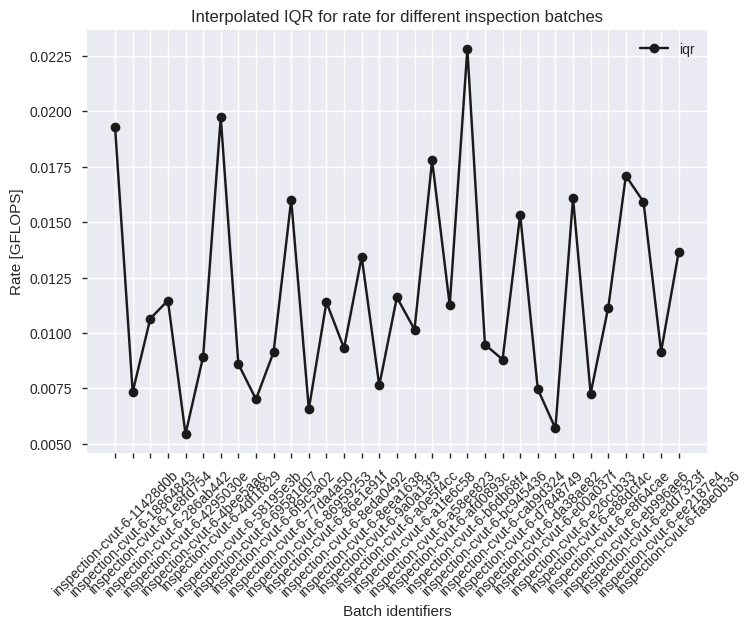

In [106]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["rate"],
    colour_list=["k"],
    statistical_quantities=["iqr"],
    title_plot="Interpolated IQR for rate for different inspection batches",
    title_xlabel="Batch identifiers",
    title_ylabel="Rate [GFLOPS]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Interpolations")

### Coefficient of Variation analysis

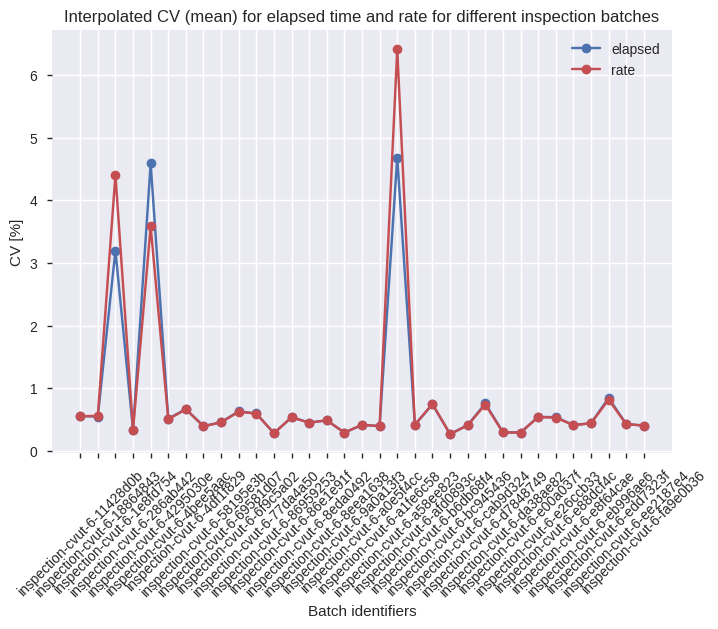

In [107]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["elapsed", "rate"],
    colour_list=["b", "r"],
    statistical_quantities=["cv_mean"],
    title_plot="Interpolated CV (mean) for elapsed time and rate for different inspection batches",
    title_xlabel="Batch identifiers",
    title_ylabel="CV [%]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Interpolations")

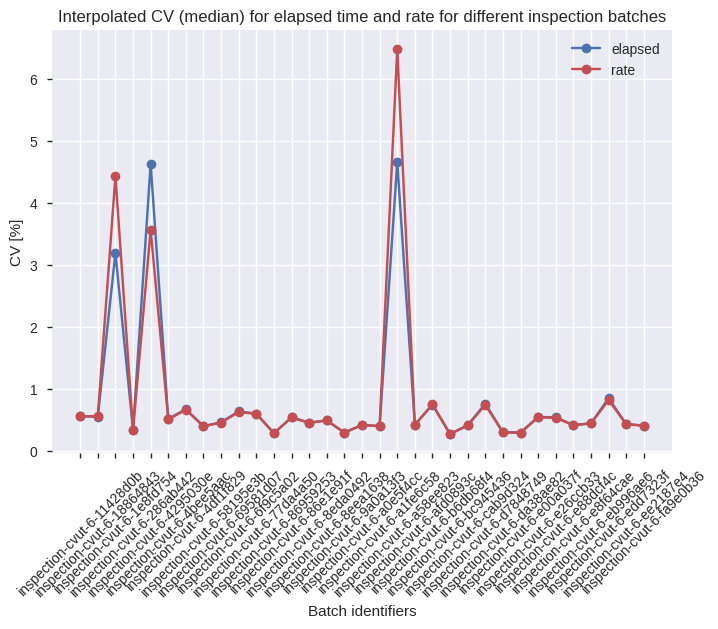

In [108]:
inspection.plot_interpolated_statistics_of_inspection_parameters(
    statistical_results_dict=inspection_statistics_dict,
    identifier_inspection_list=REDUCED_INSPECTION_BATCH,
    inspection_parameters=["elapsed", "rate"],
    colour_list=["b", "r"],
    statistical_quantities=["cv_median"],
    title_plot="Interpolated CV (median) for elapsed time and rate for different inspection batches",
    title_xlabel="Batch identifiers",
    title_ylabel="CV [%]",
    save_result=SAVE_RESULTS,
    project_folder=PROJECT_DIR_NAME,
    folder_name="Interpolations")

# Inspection Time analysis

In [109]:
# inspection_time_df = inspection.create_inspection_time_dataframe(inspection_df_dict)

## Inspection Builds Time

In [110]:
# inspection.create_plot_from_df(inspection_time_df,
#             columns= ["batches","builds_time"],
#             title_plot="Time spent to evaluate all inspections builds in hours (ASSUMPTIONS ~6 in parallel)",
#             x_label="Batch Identifier", 
#             y_label="Tot Time for builds [h]",
#             static=STATIC_FIGURE,
#             save_result=SAVE_RESULTS,
#             project_folder=PROJECT_DIR_NAME,
#             folder_name="TimePlots")

## Inspection Jobs Time

In [111]:
# inspection.create_plot_from_df(inspection_time_df,
#             columns= ["batches","jobs_time"],
#             title_plot="Time spent to evaluate all inspections jobs in hours (ASSUMPTIONS ~6 in parallel)",
#             x_label="Batch Identifier", 
#             y_label="Tot Time for jobs [h]",
#             static=STATIC_FIGURE,
#             save_result=SAVE_RESULTS,
#             project_folder=PROJECT_DIR_NAME,
#             folder_name="TimePlots")

## Inspection Builds + Jobs Time

In [112]:
# inspection.create_plot_from_df(inspection_time_df,
#             columns= ["batches","tot_time"],
#             title_plot="Time spent to evaluate all inspections builds + jobs in hours (ASSUMPTIONS ~6 in parallel)",
#             x_label="Batch Identifier", 
#             y_label="Tot Time for builds + jobs [h]",
#             static=STATIC_FIGURE,
#             save_result=SAVE_RESULTS,
#             project_folder=PROJECT_DIR_NAME,
#             folder_name="TimePlots")